# Milestone 2

## Author - Natalie Moore



### Introduction

This notebook uses a dataset provided by NASA and collected by the The Meteoritical Society containing information from all the known meteorite landings on Earth. The dataset contains 34,513 meteorites and the following attributes:

*meteorite name, id number, nametype (either valid or relict), class, mass in grams, fall (either fell or found), year, latitude, longitude, and geolocation.*

My analysis of this dataset will aim to answer the following questions:

- what is the mass distribution of Earth's meteorites?
- how often do meteorites collide with Earth?
- where on Earth do meteroites fall? 
- what does this dataset show about human scientific progress?

In [54]:
#importing necessary packages
from datetime import datetime
import pandas as pd
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import scipy

#matplotlib formatting that I like
%matplotlib inline

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 200

#plt.rcParams['figure.autolayout'] = False
#plt.rcParams['figure.figsize'] = 10,10
#plt.rcParams['axes.labelsize'] = 18
#plt.rcParams['axes.titlesize'] = 20
#plt.rcParams['font.size'] = 16
#plt.rcParams['lines.linewidth'] = 2.0
#plt.rcParams['lines.markersize'] = 11
#plt.rcParams['legend.fontsize'] = 14

#matplotlib.rcParams['xtick.direction'] = 'out'
#matplotlib.rcParams['ytick.direction'] = 'out'

In [2]:
#reading in the data and creating the meteorites_df dataframe
def read_meteorites_df(fileName = 'https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD'):
    'Function to load the auto price data set from a .csv file' 

    #read the .csv file with the pandas read_csv method
    meteorites_df = pd.read_csv(fileName)
    
    #naming columns
    meteorites_df.columns = ['name', 'id', 'nametype', 
            'recclass', 'mass', 'fall', 
            'year', 'reclat', 'reclong', 'geolocation']
    
    #replacing nan strings with NaN floats/removing the rows that contain NaN floats
    meteorites_df = meteorites_df.replace(to_replace="nan", value=float("NaN"))
    meteorites_df = meteorites_df.dropna(axis = 0)
    meteorites_df = meteorites_df.reset_index()
    
    #reformatting the year column to be just a year as an int instead of a string
    for i in range(len(meteorites_df)):        
        meteorites_df.loc[i,'year'] = datetime.strptime(meteorites_df.loc[i,'year'], '%m/%d/%Y %I:%M:%S %p')
        meteorites_df.loc[i,'year'] = meteorites_df.loc[i,'year'].year
        
    #changing the mass column from units of grams to kilograms
    meteorites_df.loc[:,'mass'] = meteorites_df.loc[:,'mass']/1000 
    
    return meteorites_df

meteorites_df = read_meteorites_df()

meteorites_df.describe()

,index,id,mass,year,reclat,reclong
count,38115.000000,38115.000000,38115.000000,38115.000000,38115.000000,38115.000000
mean,22444.738633,25343.139000,15.600706,1989.993913,-39.596529,61.309359
std,13910.476408,17395.360205,628.681746,25.469892,46.175830,80.777583
min,0.000000,1.000000,0.000000,860.000000,-87.366670,-165.433330
25%,9858.500000,10831.500000,0.006630,1986.000000,-76.716670,0.000000
50%,21674.000000,21732.000000,0.029090,1996.000000,-71.500000,35.666670
75%,35074.500000,39887.500000,0.187290,2002.000000,0.000000,157.166670
max,45715.000000,57458.000000,60000.000000,2101.000000,81.166670,178.200000


In [3]:
print (meteorites_df.dtypes, meteorites_df.shape)

index            int64
name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year             int64
reclat         float64
reclong        float64
geolocation     object
dtype: object (38115, 11)


C:\Users\natal\AnacondaNEW\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Figure 1')

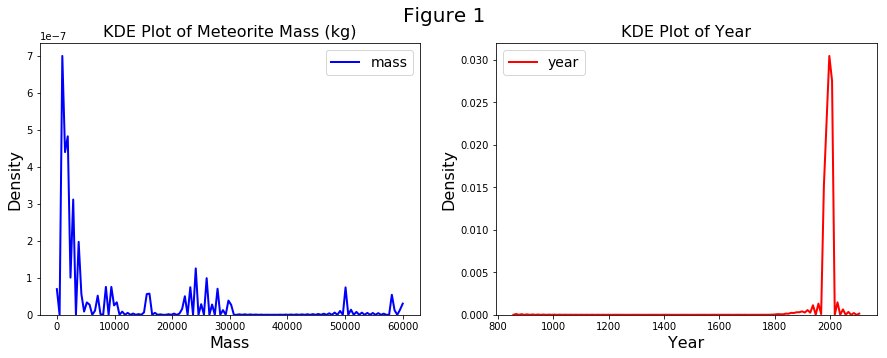

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1 = sns.kdeplot(meteorites_df.loc[:,'mass'], ax=ax[0], color = 'blue')
ax2 = sns.kdeplot(meteorites_df.loc[:,'year'], ax=ax[1], color = 'red')

ax1.set_title('KDE Plot of Meteorite Mass (kg)', fontsize=16)
ax1.set_xlabel('Mass', fontsize=16)
ax1.set_ylabel('Density', fontsize=16)
ax2.set_title('KDE Plot of Year', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Density', fontsize=16)
fig.suptitle('Figure 1', fontsize=20)

- **Figure 1** shows the Kernal Density Estimation plot of both meteorite mass (left) and year the meteorite fell (right). 

    From these plots it is shown that most of the meteorites that collide with Earth are small; below 500 kg. It is also shown that most of the meteorites in this database fell recently; within 100 years. The inference from this information is that humans were more able to record meteorite collisions within the past century, which correlates with the fact that The Meteorical Society (source of this dataset) was founded in 1933.


Text(0.5,0.98,'Figure 2')

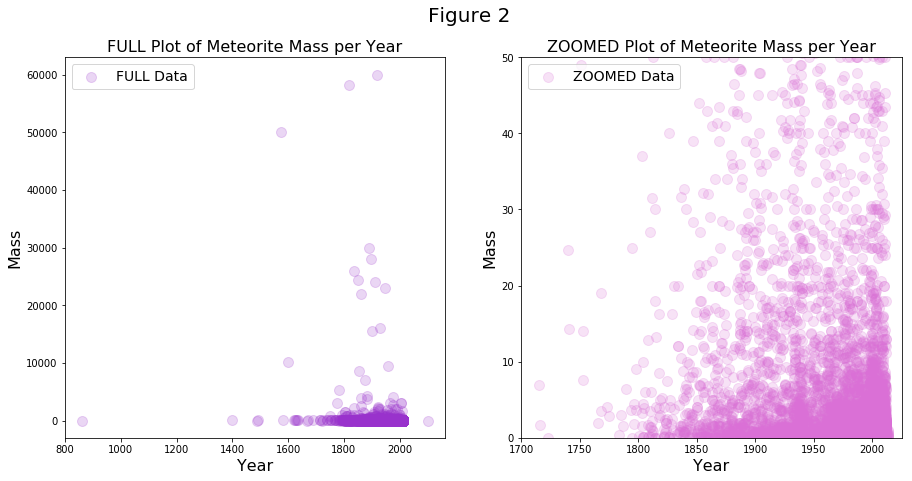

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax1 = meteorites_df.plot.scatter(x = 'year', y = 'mass', ax = ax[0], color = 'DarkOrchid', alpha = .2, s = 100, label = 'FULL Data')
ax2 = meteorites_df.plot.scatter(x = 'year', y = 'mass', ax = ax[1], color = 'Orchid', alpha = .2, s = 100, label = 'ZOOMED Data')
ax2.set_xlim([1700, 2025]) # apply the x-limits
ax2.set_ylim([0, 50]) # apply the y-limits

ax1.legend()
ax2.legend()
ax1.set_title('FULL Plot of Meteorite Mass per Year', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mass', fontsize=16)
ax2.set_title('ZOOMED Plot of Meteorite Mass per Year', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Mass', fontsize=16)
fig.suptitle('Figure 2', fontsize=20)

- **Figure 2** shows scatter plots of meteorite mass per year, the left plot containing the dataset's complete points and the right plot containing a subset of points from the most dense region. 

    These plots are consistent with Figure 1; showing the increase in meteorite detection density increasing as time progresses. This is, again, suggestive of an increase in human's ability to detect meteorite collisions with scientific maturity. It is also worth noting that the majority of meteorites detected are on the low-end of kilogram mass.


C:\Users\natal\AnacondaNEW\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Year')

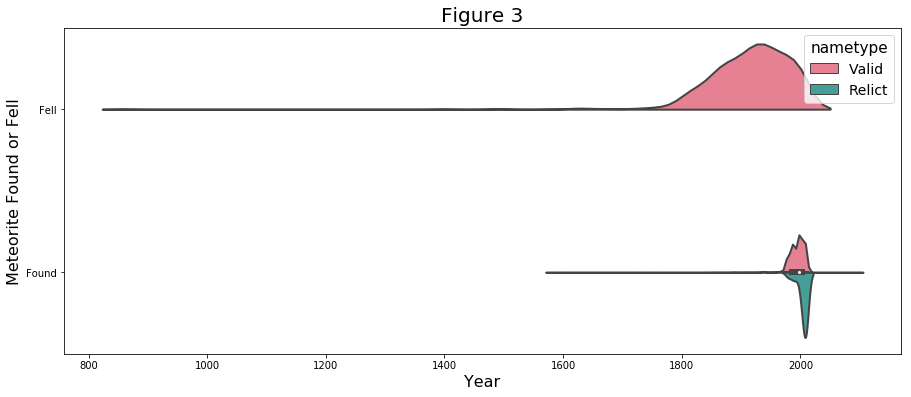

In [6]:
ax = plt.figure(figsize=(15,6)).gca()
sns.violinplot(x = 'year', y = 'fall', hue = 'nametype', data = meteorites_df, split = True, palette = 'husl', ax = ax)

ax.set_title('Figure 3', fontsize=20) # Give the plot a main title
ax.set_ylabel('Meteorite Found or Fell', fontsize=16)# Set text for y axis
ax.set_xlabel('Year', fontsize=16)# Set text for y axis

**Figure 3** shows a split violin plot of meteorites found or fell per year, with an additional emphasis on the meteorite type (valid or relict). 

- Valid meteorites are found soon after they have collided with Earth's surface while relict meteorites are found after the meteorite composition has been altered by Earth's geological processes some time later.

    This figure shows that most meteorites are fell, not found. Additionally, it appears that the only relict meteorites are found and are more frequent than meteorites that have been found before becoming relicts. This plot is, again, consistent with the previous figures' portrayal of human's ability to detect more meteorites in the recent scientific age. It is also worth noting that humans have not found previously fallen meteorites until about the year 1600, while we have been able to detect meteorites as they have fallen since before the year 900.

Text(0.5,0,'Meteorite Latitude')

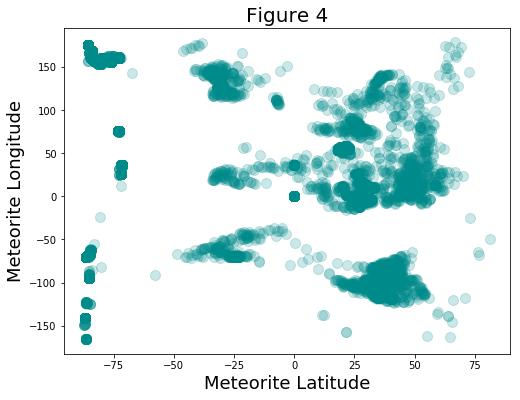

In [7]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
meteorites_df.plot.scatter(x = 'reclat', y = 'reclong', color = 'DarkCyan', alpha = .2, s = 100, ax = ax)
ax.set_title('Figure 4') # Give the plot a main title
ax.set_ylabel('Meteorite Longitude')# Set text for y axis
ax.set_xlabel('Meteorite Latitude')

- **Figure 4** shows a scatter plot for latitude and longitude of meteorite collision. 

    This figure shows the general density of areas on the Earth meteorites seem to fall. Without a map, this figure cannot tell us much about where meteorites are detected the most. However, we can infer that extremely blank areas on the plot are probably oceanic and not continental.

In [8]:
#### uncomment and run code below to see the map version of lat/lon (slow to process)

#import plotly.express as px
#fig = px.scatter_geo(meteorites_df,
 #                    lon = meteorites_df['reclong'],
  #                   lat = meteorites_df['reclat'],
   #                  size = 'mass', # size of markers, "pop" is one of the columns of gapminder
    #                 color = 'year',
     #                projection = "natural earth",
      #               title = 'Figure 5'
       #             )
#fig.show()

- **Figure 5** shows a scatter plot projected onto a map of Earth for latitude and longitude of meteorite collision. The size of the points represent the mass of each meteorite, and the color represents the year each meteorite fell.

    This figure is a more useful representation of Figure 4. As we suspected from Figure 4, we can now see that humans do not often detect meteorite collisions in Earth's oceans. We can also see that the heaviest meteorites are found scattered accross all continents. The oldest known meteorite collisions are found on the west coast of North America and central South America. It is worth noting that the areas where humans do not reside (Antarctica, oceans, deserts, tundras, and jungles) do not contain many meteorite detections. 

### Summary Statistics: MASS

Text(0.5,1,'Mass Summary')

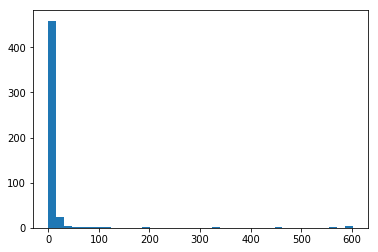

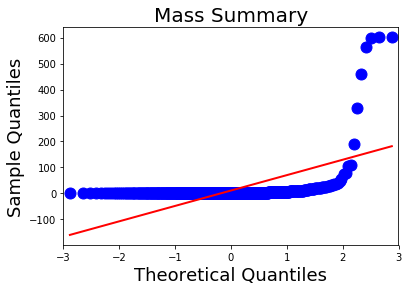

In [40]:
mass_means = np.array([
        np.random.choice(meteorites_df['mass'], size=50, replace=True).mean()
        for i in range(500)])

breaks = np.linspace(mass_means.min(), mass_means.max(), num=40)
_ = plt.hist(mass_means, bins=breaks)
_ = sm.qqplot(mass_means, line='s')

plt.title('Mass Summary')

The mass distribution is far from normal!

In [56]:
#classical sample statistics

massPop_mean = mass_means.mean()
massPop_std = mass_means.std()
print('Estimated mean of mass (%.3f) vs actual mean of mass (%.3f)' % (massPop_mean, meteorites_df['mass'].mean()))
print('Estimated s.d. of mass (%.3f) vs actual s.d. of mass (%.3f)' % (massPop_std, meteorites_df['mass'].std()))

Estimated mean of mass (11.060) vs actual mean of mass (15.601)
Estimated s.d. of mass (59.343) vs actual s.d. of mass (628.682)


In [55]:
#classical confidence interval calculation

alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=massPop_mean, scale=massPop_std) - massPop_mean
print('The half width is %.2f' % half_width)

ci_low = massPop_mean - half_width
ci_high = massPop_mean + half_width

print('The actual mean is %.2f' % meteorites_df['mass'].mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 116.31
The actual mean is 15.60
The 0.95 level CI is (-105.25 , 127.37)


### Summary Statistics: YEAR

Text(0.5,1,'Year Summary')

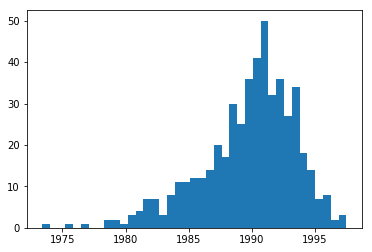

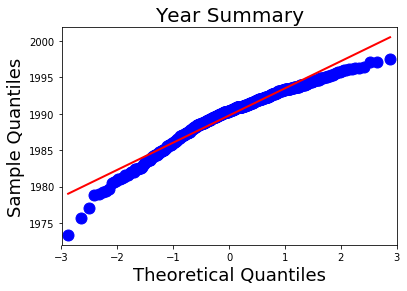

In [43]:
year_means = np.array([
        np.random.choice(meteorites_df['year'], size=50, replace=True).mean()
        for i in range(500)])

breaks = np.linspace(year_means.min(), year_means.max(), num=40)
_ = plt.hist(year_means, bins=breaks)
_ = sm.qqplot(year_means, line='s')

plt.title('Year Summary')

In [44]:
#classical summary statistics

yearPop_mean = year_means.mean()
yearPop_std = year_means.std()
print('Estimated mean of year (%.3f) vs actual mean of year (%.3f)' % (yearPop_mean, meteorites_df['year'].mean()))
print('Estimated s.d. of year (%.3f) vs actual s.d. of year (%.3f)' % (yearPop_std, meteorites_df['year'].std()))

Estimated mean of year (1989.760) vs actual mean of year (1989.994)
Estimated s.d. of year (3.728) vs actual s.d. of year (25.470)


In [57]:
#classical confidence interval calculation

alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=yearPop_mean, scale=yearPop_std) - yearPop_mean
print('The half width is %.2f' % half_width)

ci_low = yearPop_mean - half_width
ci_high = yearPop_mean + half_width

print('The actual mean is %.2f' % meteorites_df['year'].mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 7.31
The actual mean is 1989.99
The 0.95 level CI is (1982.45 , 1997.07)


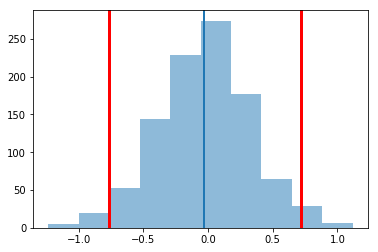

In [74]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

n_replicas = 1000
diffs = []

for i in range(n_replicas):
    sample = meteorites_df.sample(frac=1.0, replace=True)
    lowCI_sample_mean = sample[sample.year == 1982].mass.mean()
    hiCI_sample_mean = sample[sample.year == 1997].mass.mean()
    diffs.append(lowCI_sample_mean - hiCI_sample_mean)
diffs = pd.Series(diffs)

plot_hist(diffs)

The distribution of the difference in means between meteorite mass from 1982 vs. 1997 are almost negligible. 

### Summary Statistics: LATITUDE

Text(0.5,1,'Latitude Summary')

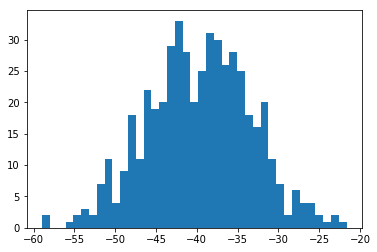

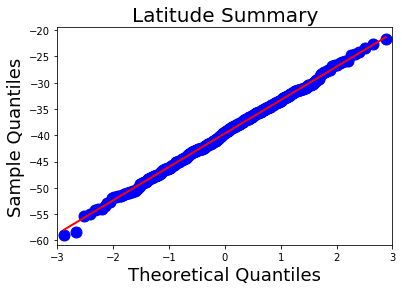

In [45]:
lat_means = np.array([
        np.random.choice(meteorites_df['reclat'], size=50, replace=True).mean()
        for i in range(500)])

breaks = np.linspace(lat_means.min(), lat_means.max(), num=40)
_ = plt.hist(lat_means, bins=breaks)
_ = sm.qqplot(lat_means, line='s')

plt.title('Latitude Summary')

In [46]:
#classical summary statistics

latPop_mean = lat_means.mean()
latPop_std = lat_means.std()
print('Estimated mean of latitude (%.3f) vs actual mean of latitude (%.3f)' % (latPop_mean, meteorites_df['reclat'].mean()))
print('Estimated s.d. of latitude (%.3f) vs actual s.d. of latitude (%.3f)' % (latPop_std, meteorites_df['reclat'].std()))

Estimated mean of latitude (-39.677) vs actual mean of latitude (-39.597)
Estimated s.d. of latitude (6.361) vs actual s.d. of latitude (46.176)


In [58]:
#classical confidence interval calculation

alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=latPop_mean, scale=latPop_std) - latPop_mean
print('The half width is %.2f' % half_width)

ci_low = latPop_mean - half_width
ci_high = latPop_mean + half_width

print('The actual mean is %.2f' % meteorites_df['reclat'].mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 12.47
The actual mean is -39.60
The 0.95 level CI is (-52.14 , -27.21)


### Summary Statistics: LONGITUDE

Text(0.5,1,'Longitude Summary')

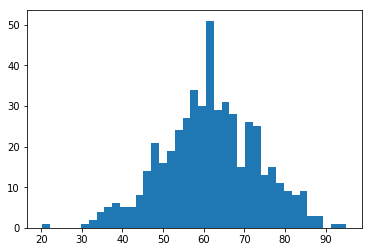

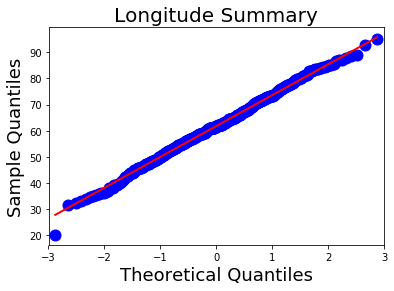

In [50]:
lon_means = np.array([
        np.random.choice(meteorites_df['reclong'], size=50, replace=True).mean()
        for i in range(500)])

breaks = np.linspace(lon_means.min(), lon_means.max(), num=40)
_ = plt.hist(lon_means, bins=breaks)
_ = sm.qqplot(lon_means, line='s')

plt.title('Longitude Summary')

In [60]:
#classical summary statistics

lonPop_mean = lon_means.mean()
lonPop_std = lon_means.std()
print('Estimated mean of longitude (%.3f) vs actual mean of longitude (%.3f)' % (lonPop_mean, meteorites_df['reclong'].mean()))
print('Estimated s.d. of longitude (%.3f) vs actual s.d. of longitude (%.3f)' % (lonPop_std, meteorites_df['reclong'].std()))

Estimated mean of longitude (61.780) vs actual mean of longitude (61.309)
Estimated s.d. of longitude (11.777) vs actual s.d. of longitude (80.778)


In [61]:
#classical confidence interval calculation

alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=lonPop_mean, scale=lonPop_std) - lonPop_mean
print('The half width is %.2f' % half_width)

ci_low = lonPop_mean - half_width
ci_high = lonPop_mean + half_width

print('The actual mean is %.2f' % meteorites_df['reclong'].mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 23.08
The actual mean is 61.31
The 0.95 level CI is (38.70 , 84.86)
